<a href="https://colab.research.google.com/github/Shangzhe2001/4212ass2/blob/main/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  nn on music

we use tensorflow to help us build the neural network, the idea is simple

as it's a multi-class problem.
we build a 3 dense layer with non-linear layer as relu;
for the last non-linear  layer to the final output., we use the softmax function.

reference : https://www.tensorflow.org/guide/keras/sequential_model?hl=zh-cn


for the loss ：

for the optimization , we use adam

In [25]:
# deep learning package
import tensorflow as tf
print("TF version:-", tf.__version__)
import keras as k
tf.random.set_seed(23)

TF version:- 2.8.0


In [22]:
# Set-Ups
import csv
import math
import random
import string
import numpy as np
import pandas as pd 
import pylab as plt

# Load the data
df = pd.read_csv("/content/drive/MyDrive/train.csv", sep=",",skipinitialspace = True)
#df = pd.read_csv("framingham.csv", sep=",")
## data split
from sklearn.model_selection import train_test_split

df = df.dropna()
df = df.drop(columns=['Track Name'])
df["Artist Name"] = df["Artist Name"].astype(str)

from sklearn import preprocessing
number = preprocessing.LabelEncoder()
df["Artist Name"] = number.fit_transform(df["Artist Name"])

df_X = df[df.columns[df.columns != 'Class']].copy()
df_y = df['Class'].copy()


X_train, test_valid_X, y_train, test_valid_y = train_test_split(df_X, df_y, test_size=0.2, random_state=0)
print ("Number of training instances: ", len(X_train), "\nNumber of test instances: ", len(test_valid_X)/2)

X_dev, X_test, y_dev, y_test = train_test_split(test_valid_X, test_valid_y, train_size=0.5, random_state=0)
                                                

Number of training instances:  9450 
Number of test instances:  1181.5


In [29]:
df_y.max() # from 0 to 10, totally 11 

10

In [38]:
X_train.shape[1]

15

In [46]:
def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

def trainModel(model, epochs, optimizer):
    
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )

    return model.fit(X_train, y_train, 
                     
                     epochs=epochs, 
                     batch_size=64, 
                     validation_data=(X_dev, y_dev)

                     )
    

model_1 = k.models.Sequential([
    k.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.4),
    
    # we add a dropout layer to avoid overfitting
    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.4),

    k.layers.Dense(32, activation='relu'),
    k.layers.Dropout(0.4),

    k.layers.Dense(11, activation='softmax'),
])

print(model_1.summary())

model_1_history = trainModel(model=model_1, epochs=100, optimizer= opt)

# model  evaluation

test_loss, test_acc  = model_1.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("\nThe Best test Accuracy is :",test_acc*100)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               2048      
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dropout_29 (Dropout)        (None, 32)                0         
                                                                 
 dense_39 (Dense)            (None, 11)               

Max. Validation Accuracy 0.29212531447410583


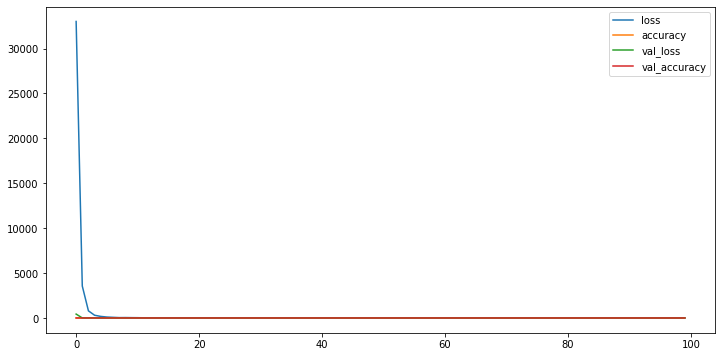

In [44]:
plotHistory(model_1_history)

In [37]:
import xgboost as xgb
xg_cl = xgb.XGBClassifier(objective='multi:softmax', n_estimators=2, seed=4212)
xg_cl.fit(X_train,y_train)

print('GBDT accuracy for training set: %f' % xg_cl.score(X_train, y_train))
print('GBDT forest accuracy for test set: %f' % xg_cl.score(X_test, y_test))

GBDT accuracy for training set: 0.469524
GBDT forest accuracy for test set: 0.454315
